#Mask R-CNN instance segmentation with custom dataset in Google Colab


#Making Dataset
I generated dataset annotations with [VGG Image Annotator](http://www.robots.ox.ac.uk/~vgg/software/via/).

Notebook train a model for one class object detection. It is possible to slightly modify notebook to train model for multiple classes.

Before running notebook, we need to create dataset:


1.   Collect various pictures of objects to detect
3.   Create annotation files in VGG



# **Install required packages**

In [1]:
!git clone --quiet https://github.com/matterport/Mask_RCNN.git

# **install tensorflow + keras**

In [2]:
%tensorflow_version 1.x
!pip uninstall keras -y && pip install keras==2.1.0
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

TensorFlow 1.x selected.
Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 307kB 9.1MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
1.15.2
2.1.0


Using TensorFlow backend.


In [3]:
%cd /content/Mask_RCNN

!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

/content/Mask_RCNN
     |████████████████████████████████| 204kB 8.1MB/s 
     |████████████████████████████████| 163kB 53.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=fa364896f0721cd35e8fce368ecf802b4240df8fc6087f55a29222257a24b4b9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/m

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


code pour decomposer aleatoirement une dataset

In [ ]:
'''import random
import glob
import os
import shutil
#sampling with replacement

list_img=glob.glob('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/dataset/*')
sampling = random.sample(list_img, k=38)
print(sampling)


# Move a file from the directory d1 to d2
for file in sampling:
  shutil.move(file, file.replace('dataset','dataset/val'))
'''

"import random\nimport glob\nimport os\nimport shutil\n#sampling with replacement\n\nlist_img=glob.glob('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/dataset/*')\nsampling = random.sample(list_img, k=38)\nprint(sampling)\n\n\n# Move a file from the directory d1 to d2\nfor file in sampling:\n  shutil.move(file, file.replace('dataset','dataset/val'))\n"

#Download and extract dataset
Update fileId variable with Google Drive id of your image.zip dataset


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/Colab Notebooks/Mask_RCNN_logs_dog/logs/dog20200627T0830/mask_rcnn_dog_0002.h5' '/content/Mask_RCNN/logs/dog20200627T0925/'
#!cp '/content/Mask_RCNN/logs/dog20200627T0925/mask_rcnn_dog_0030.h5' '/content/drive/My Drive/Colab Notebooks/Mask_RCNN_logs_dog/' 
'''

#Edit settings file
*  find and replace occurrences of "balloon" and "Balloon" with name of your object
*  set epochs number


In [ ]:
!cp /content/Mask_RCNN/samples/balloon/balloon.py ./rail.py

!sed -i -- 's/balloon/rail/g' rail.py
!sed -i -- 's/Balloon/Rail/g' rail.py
!sed -i -- 's/epochs=30/epochs=50/g' rail.py

In [ ]:
!cp /content/Mask_RCNN/samples/balloon/balloon.py ./rail.py

!sed -i -- 's/balloon/rail/g' rail.py
!sed -i -- 's/Balloon/Rail/g' rail.py
!sed -i -- 's/epochs=30/epochs=50/g' rail.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Train model
Pretrained weights options are COCO, ImageNet or a model trained before

In [ ]:
#!rm -rf /content/Mask_RCNN/dataset/
!cp -r  "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/dataset" "/content/Mask_RCNN/"

In [ ]:
!python rail.py train --dataset=/content/Mask_RCNN/dataset --weights=last

In [ ]:
!cp "/content/Mask_RCNN/logs/rail20200721T1721/mask_rcnn_rail_0100.h5" "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/"


# Nouvelle section

In [ ]:
#WAEL
!cp "/content/Mask_RCNN/logs/rail20200720T0254/mask_rcnn_rail_0100.h5" "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/"
#!python rail.py splash --weights=logs/rail20200713T0023/mask_rcnn_rail_0050.h5 --image=/content/Mask_RCNN/dataset/val/frame9000.jpg


#!python rail.py splash --weights=logs/rail20200713T0023/mask_rcnn_rail_0050.h5 --image="/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/Tramway_dataset/_w/frame11000.jpg"
#!python rail.py splash --weights=/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/Models/mask_rcnn_rail_0050.h5 --image="/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/Tramway_dataset/_w/frame11000.jpg"

#!python rail.py splash --weights=/content/Mask_RCNN/logs/rail20200720T0254/mask_rcnn_rail_0012.h5 --image="/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/Tramway_dataset/_w/test.jpg"


In [ ]:
!ffmpeg -i /content/YouTube.mp4 -ss 00:10:50 -to 00:10:53 -c copy /content/YouTubecut.mp4
!python rail.py splash --weights=logs/rail20200713T0023/mask_rcnn_rail_0050.h5 --video=/content/YouTubecut.mp4

Run inference on test dataset

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN



class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 1+1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    # Learning rate
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config = myMaskRCNNConfig()
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# loading the trained weights o the custom dataset
#model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 1/mask_rcnn_rail_0050.h5"
#model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/mask_rcnn_rail_0050.h5"
#model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/mask_rcnn_rail_0079.h5"
model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/mask_rcnn_rail_0100.h5"

#model_path = '/content/Mask_RCNN/logs/rail20200720T0254/mask_rcnn_rail_0015.h5'
model.load_weights(model_path, by_name=True)
print('Model loaded! \n\n Begin inference on Images ..\n')

#for im in glob.glob('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/dataset/val/*.jpg'):
for im in glob.glob('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/Images_input/*'):
  
  img = load_img(im)
  
  img = img_to_array(img)
  # detecting objects in the image
  result= model.detect([img])
  # Run object detection
  results = model.detect([img], verbose=1)
  # Display results

  r = results[0]
  class_names=['BG','rail']
  
  visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'], 
                              title="Predictions")

Output hidden; open in https://colab.research.google.com to view.

# Code permettant de sauvegarder l'image après la prédiction sur un DOSSIER D'IMAGE



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob

def random_colors(N):
    np.random.seed(1)
    colors=[tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors

def apply_mask(image,mask,color,alpha=0.5):
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )

    return image


class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 1+1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    # Learning rate
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config = myMaskRCNNConfig()
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# loading the trained weights o the custom dataset
model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/mask_rcnn_rail_0050.h5"
model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/mask_rcnn_rail_0079.h5"
model.load_weights(model_path, by_name=True)
print('Model loaded! \n\n Begin inference on Images ..\n')

folder_to_predict = '/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/dataset/val/'

i=0
for im in glob.glob(folder_to_predict+'*.jpg'):
  i+=1
  img = load_img(im)  
  img = img_to_array(img)
  # detecting objects in the image
  result= model.detect([img])
  # Run object detection
  results = model.detect([img], verbose=1)
  # Display results

  r = results[0]
  class_names=['BG','rail']
  frame = display_instances(img, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
  frame = np.uint8(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

  #plt.imshow(frame)
  cv2.imwrite('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/images_output/frame_'+str(i)+'.jpg',frame)

# **Prediction des rails sur une vidéo**
---



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing.image import img_to_array
from mrcnn import model as modellib
from mrcnn.config import Config


class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 1+1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    # Learning rate
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config = myMaskRCNNConfig()
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# loading the trained weights o the custom dataset
model_path = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/mask_rcnn_rail_0061.h5"
model.load_weights(model_path, by_name=True)
class_names=['BG','rail']

print('Model loaded! \n\n Begin inference on Images ..\n')

def random_colors(N):
    np.random.seed(1)
    colors=[tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors

def apply_mask(image,mask,color,alpha=0.5):
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )

    return image

videolink="/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/videos_input/rail_cut_bus.mp4"
print(videolink)
videoname=videolink.split('/')[-1].split('.')[0]

##### Ouverture d'une vidéo et récupération de nombre d'FPS et nombre total des Frames dans la vidéo #####
cap=cv2.VideoCapture(videolink)
fps = cap.get(cv2.CAP_PROP_FPS)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

width  = int(cap.get(3))  # float
height = int(cap.get(4)) # float

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/videos_output/'+videoname+'3_out.avi', fourcc, fps, (width,height))
      

##########################################################################################################

for z in tqdm(range(length)):
  ret, frame = cap.read()
  # Bail out when the video file ends
  if not ret:
    break        
      # Save each frame of the video to a list

  img = img_to_array(frame)
  # detecting objects in the image
  result= model.detect([img])
  # Run object detection
  results = model.detect([img], verbose=1)
  r = results[0]

  frame = display_instances(img, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'])
  frame = np.uint8(frame)
  
  #plt.imshow(frame)
  #plt.show()
      
  #cv2.imwrite('file.jpg',frame)
  out.write(frame)

cap.release()
out.release()


# **la prediction pour les voitures en utilsant le masque rcnn entrainé sur la base coco**

In [ ]:
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [ ]:
!cp '/content/mask_rcnn_coco.h5' '/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/prediction voitures'

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN



class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 80+1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    # Learning rate
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config = myMaskRCNNConfig()
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# loading the trained weights o the custom dataset
#model_path = ""

model_path = '/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/prediction voitures/mask_rcnn_coco.h5'
model.load_weights(model_path, by_name=True)
print('Model loaded! \n\n Begin inference on Images ..\n')

for im in glob.glob('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/dataset/val/*'):
  
  img = load_img(im)
  
  img = img_to_array(img)
  # detecting objects in the image
  result= model.detect([img])
  # Run object detection
  results = model.detect([img], verbose=1)
  # Display results

  r = results[0]
  # define 81 classes that the coco model knowns about
  class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']  
               
  visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'], 
                              title="Predictions")

Output hidden; open in https://colab.research.google.com to view.

# Utilisation des deux moèles Rails et COCO sur une liste des images


Model loaded! 

 Begin inference on Images ..

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


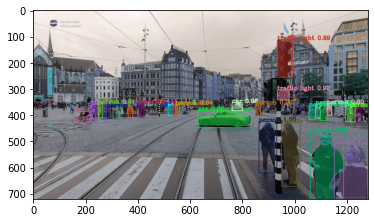

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
from mrcnn.config import Config
from mrcnn import model as modellib



def random_colors(N):
    np.random.seed(1)
    colors=[tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors

def apply_mask(image,mask,color,alpha=0.5):
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )

    return image

#partie de coco


class myMaskRCNNConfig_coco(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 80+1
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config_coco = myMaskRCNNConfig_coco()
#Loading the model in the inference mode
model_coco = modellib.MaskRCNN(mode="inference", config=config_coco, model_dir='./')
# loading the trained weights o the custom dataset
model_path_coco = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/prediction voitures/mask_rcnn_coco.h5"

model_coco.load_weights(model_path_coco, by_name=True)



# define 81 classes that the coco model knowns about
class_names_coco = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']  








class myMaskRCNNConfig_rail(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 1+1
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

class_names_rail=['BG','rail']

config_rail = myMaskRCNNConfig_rail()
#Loading the model in the inference mode
model_rail = modellib.MaskRCNN(mode="inference", config=config_rail, model_dir='./')
# loading the trained weights o the custom dataset
model_path_rail = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/mask_rcnn_rail_0100.h5"

model_rail.load_weights(model_path_rail, by_name=True)
print('Model loaded! \n\n Begin inference on Images ..\n')

folder_to_predict = '/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 3/dataset/val_1/'


#prediction

i=0

for im in glob.glob(folder_to_predict+'*.jpg'):
  i+=1
  img = load_img(im)  
  img = img_to_array(img)
 

  # detecting objects in the image
  result_coco= model_coco.detect([img])
  # Run object detection
  results_coco = model_coco.detect([img], verbose=1)
  # Display results
  r_coco = results_coco[0]
  

  frame = display_instances(img, r_coco['rois'], r_coco['masks'], r_coco['class_ids'],
                            class_names_coco, r_coco['scores'])

  frame = np.uint8(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    
  plt.imshow(frame)
  cv2.imwrite('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/images_output/frame_RAIL_et_COCO_'+str(i)+'.jpg',frame)



# Utilisation des deux moèles Rails et COCO sur une video


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
from mrcnn.config import Config
from mrcnn import model as modellib
from tqdm import tqdm


def random_colors(N):
    np.random.seed(1)
    colors=[tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors

def apply_mask(image,mask,color,alpha=0.5):
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )

    return image

#partie de coco


class myMaskRCNNConfig_coco(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 80+1
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

config_coco = myMaskRCNNConfig_coco()
#Loading the model in the inference mode
model_coco = modellib.MaskRCNN(mode="inference", config=config_coco, model_dir='./')
# loading the trained weights o the custom dataset
model_path_coco = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/prediction voitures/mask_rcnn_coco.h5"

model_coco.load_weights(model_path_coco, by_name=True)



# define 81 classes that the coco model knowns about
class_names_coco = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']  








class myMaskRCNNConfig_rail(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background)
     # rail + BG
    NUM_CLASSES = 1+1
    LEARNING_RATE=0.006
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    # setting Max ground truth instances
    MAX_GT_INSTANCES=1

class_names_rail=['BG','rail']

config_rail = myMaskRCNNConfig_rail()
#Loading the model in the inference mode
model_rail = modellib.MaskRCNN(mode="inference", config=config_rail, model_dir='./')
# loading the trained weights o the custom dataset
model_path_rail = "/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement all/mask_rcnn_rail_0100.h5"

model_rail.load_weights(model_path_rail, by_name=True)
print('Model loaded! \n\n Begin inference on Images ..\n')

videolink="/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/videos_input/life-of-a-tram-driver-part-4_w8TMCMKA_4Sgo.mp4"
print(videolink)
videoname=videolink.split('/')[-1].split('.')[0]

##### Ouverture d'une vidéo et récupération de nombre d'FPS et nombre total des Frames dans la vidéo #####
cap=cv2.VideoCapture(videolink)
fps = cap.get(cv2.CAP_PROP_FPS)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

width  = int(cap.get(3))  # float
height = int(cap.get(4)) # float

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/My Drive/Stage_2020_Autonomous_Tramway_detection/archive entrainement 2/videos_output/'+videoname+'_coco_out.avi', fourcc, fps, (width,height))
      

##########################################################################################################

for z in tqdm(range(length)):
  ret, img = cap.read()
  # Bail out when the video file ends
  if not ret:
    break        
      # Save each frame of the video to a list

  
  img = img_to_array(img)
  # ###########################################################detecting the rail
  result_rail= model_rail.detect([img])
  # Run object detection
  results_rail = model_rail.detect([img], verbose=1)
  # Display results
  r_rail = results_rail[0]
  

  frame = display_instances(img, r_rail['rois'], r_rail['masks'], r_rail['class_ids'],
                            class_names_rail, r_rail['scores'])
  
  img=frame

  # detecting objects in the image
  result_coco= model_coco.detect([img])
  ###############################################################"" Run object detection#############################""
  results_coco = model_coco.detect([img], verbose=1)
  # Display results
  r_coco = results_coco[0]
  

  frame = display_instances(img, r_coco['rois'], r_coco['masks'], r_coco['class_ids'],
                            class_names_coco, r_coco['scores'])

  frame = np.uint8(frame)
  frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
  

  out.write(frame)

cap.release()
out.release()



#prediction




    





Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
print(r_rail['masks'])
print(r_coco['masks'])
print(r_coco['rois'])

In [ ]:
print(np.shape(r_coco['masks'][:,:,0]))
np.shape(r_coco['masks'])

(720, 1280)


(720, 1280, 26)

Nombre des objets 26


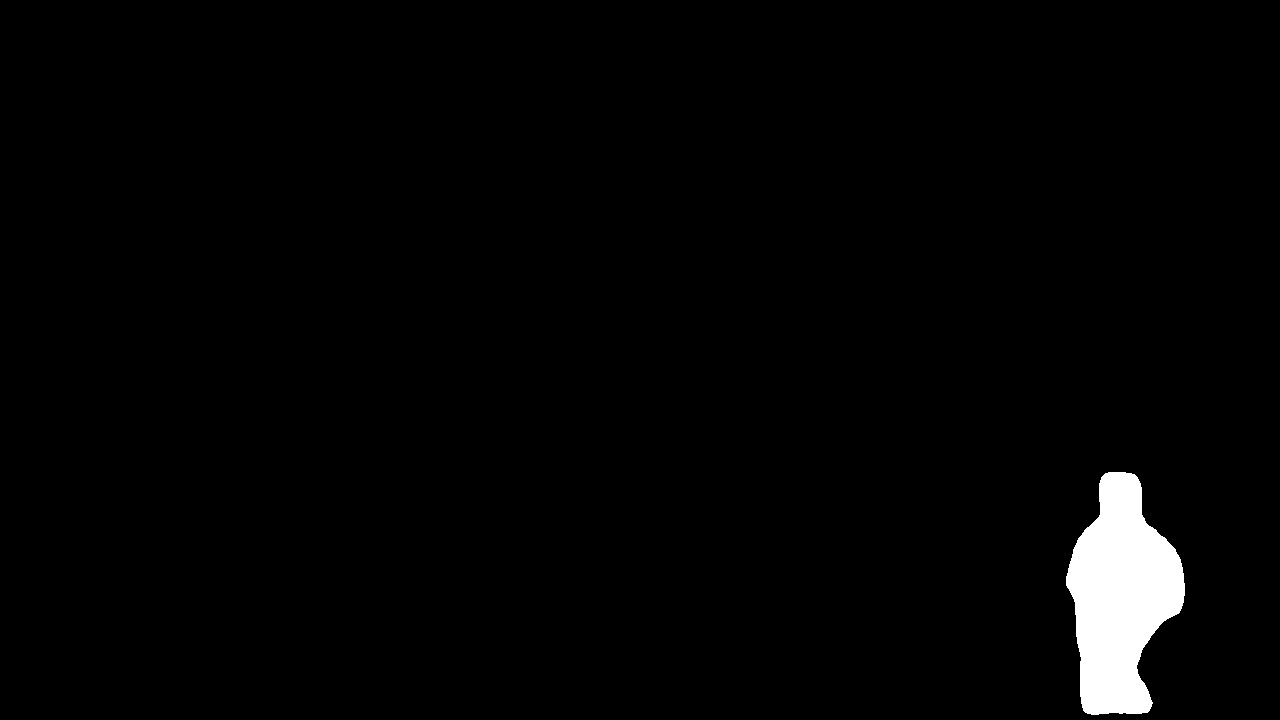

In [ ]:
from google.colab.patches import cv2_imshow
indices =r_coco['masks'][:,:,0]
print('Nombre des objets',np.shape(r_coco['masks'][:,:,:])[2])
indices = indices.astype(np.uint8)  #convert to an unsigned byte
indices*=255
cv2_imshow(indices)
#print (max((max(indices.tolist()))))

In [ ]:
indices

In [ ]:
from google.colab.patches import cv2_imshow
indices_rail =r_rail['masks'][:,:,0]
indices_rail = indices_rail.astype(np.uint8)  #convert to an unsigned byte
indices_rail*=255
cv2_imshow(indices_rail)
#print (max((max(indices_rail.tolist()))))
